In [4]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#an example
data = pd.read_csv('reviews_Berberine.csv')
data.head(30)

,dates,details,scores,reviews
0,10/6/2023,Rebekah | Age: 25-34 | On supplement for 1...,"Condition: Weight loss , Overall rating 5.0 ,...",I’ve always have had a hard time losing weight...
1,9/25/2023,Joy | Age: 65-74 | On supplement for 1 to ...,"Condition: Cardiovascular disease (CVD) , Ove...",I have been on Berberine for a year. Initially...
2,8/19/2023,A Brown | Age: 75 or over | On supplement ...,"Condition: Other , Overall rating 4.0 ,Effect...",I started Dr. Whitaker’s Berberine 4 1/2 years...
3,8/18/2023,Rufus | Age: 45-54 | On supplement for 6 m...,"Condition: High cholesterol , Overall rating ...",After 6 mos fasting glucose down 10 and choles...
4,8/6/2023,Susan | Age: 65-74 |,"Condition: Weight loss , Overall rating 4.0 ,...",I’ve mostly had a very positive experience wit...
5,8/3/2023,Age: 35-44 | On supplement for less than 1...,"Condition: Other , Overall rating 2.0 ,Effect...","I took 1000mg per day for 7 days, felt good fo..."
6,8/3/2023,Deb | Age: 65-74 | On supplement for 6 mon...,"Condition: Heart disease , Overall rating 4.0...",Initially on berberine I experienced some mood...
7,7/29/2023,Kimberly | Age: 65-74 | On supplement for ...,"Condition: Weight loss , Overall rating 5.0 ,...",Started Berberine after a friend told me about...
8,7/25/2023,Trotter | Age: 65-74 | On supplement for 1...,"Condition: Other , Overall rating 2.0 ,Effect...","800 mg twice a day for 45 days (1600mg), it di..."
9,7/18/2023,Age: 35-44 | On supplement for less than 1...,"Condition: Obesity , Overall rating 4.3 ,Effe...",I have been on berberine for two weeks and hav...


In [6]:
files = [f for f in os.listdir('.') if f.endswith('.csv')][:8]
all_dataframes = []

In [7]:
duration_dict = {
    r'less than 1 month': '<1',
    r'1 to 6 months': '1-6',
    r'6 months to less than 1 year': '6-12',
    r'1 to less than 2 years': '12-24',
    r'2 to less than 5 years': '24-60',
    r'5 to less than 10 years': '60-120',
    r'10 years or more': '>120'
}

In [8]:
# data extraction
for file in files:

    df = pd.read_csv(file)

    name_part = os.path.basename(file).split('reviews_')[-1].replace('.csv', '')
    df['name'] = name_part

    df['dates'] = pd.to_datetime(df['dates'])
    df['dates'] = df['dates'].dt.date

    df['age'] = df['details'].str.extract(r'Age: (\d+-\d+) \|')

    df['duration, months'] = df['details'].str.extract(r'for\s+(.*?)(?=\|)').replace(duration_dict, regex=True)

    df['сondition'] = df['scores'].str.extract(r'Condition: ([^,]*)')
    df['сondition'] = df['сondition'].str.strip()
    df.loc[df['сondition'] == '', 'сondition'] = pd.NA

    df['overall rating'] = df['scores'].apply(lambda s: re.search(r'\d+\.\d+|\d+,', s).group().replace(',', '.') if re.search(r'\d+\.\d+|\d+,', s) else None)
    df['overall rating'] = df['overall rating'].astype(float)

    all_dataframes.append(df)

    df.drop(['details', 'scores'], axis=1, inplace=True)

    reviews_column = df.pop('reviews')
    df['reviews'] = reviews_column


combined_df = pd.concat(all_dataframes, ignore_index=True)

combined_df.insert(0, 'ID', range(1, len(combined_df) + 1))

In [9]:
combined_df.head(100)

,ID,dates,name,age,"duration, months",сondition,overall rating,reviews
0,1,2023-05-10,Ginkgo,3-6,NaN,<NA>,2.7,NaN
1,2,2023-05-10,Ginkgo,3-6,NaN,<NA>,2.7,NaN
2,3,2023-05-10,Ginkgo,3-6,NaN,<NA>,2.7,NaN
3,4,2023-01-31,Ginkgo,65-74,<1,Tinnitus,2.7,No effect on tinnitus
4,5,2022-03-11,Ginkgo,55-64,1-6,Peripheral arterial disease (PAD),4.3,"Take gingo for the pain in my legs, it works. ..."
...,...,...,...,...,...,...,...,...
95,96,2014-09-13,Folic_acid,25-34,1-6,Other,2.0,NaN
96,97,2014-08-05,Folic_acid,35-44,1-6,Other,3.0,one ear still block
97,98,2014-07-29,Folic_acid,55-64,1-6,Other,3.7,My doctor added this supplement to my antidepr...
98,99,2014-06-24,Folic_acid,NaN,1-6,Cancer,4.0,just want to know the benefits


In [10]:
combined_df.to_csv("combined_data.csv", index=False)

In [11]:
#data analysis
print('number of rows, columns', combined_df.shape)
combined_df.info()

number of rows, columns (1253, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1253 non-null   int64  
 1   dates             1253 non-null   object 
 2   name              1253 non-null   object 
 3   age               1112 non-null   object 
 4   duration, months  1133 non-null   object 
 5   сondition         1181 non-null   object 
 6   overall rating    1253 non-null   float64
 7   reviews           1080 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 78.4+ KB


In [12]:
combined_df.describe()

,ID,overall rating
count,1253.000000,1253.000000
mean,627.000000,3.886353
std,361.854252,1.268347
min,1.000000,1.000000
25%,314.000000,3.000000
50%,627.000000,4.300000
75%,940.000000,5.000000
max,1253.000000,5.000000


In [13]:
combined_df['dates'] = pd.to_datetime(combined_df['dates'])
combined_df['age'] = combined_df['age'].astype('category')
combined_df['duration, months'] = combined_df['duration, months'].astype('category')
combined_df['сondition'] = combined_df['сondition'].astype('category')
combined_df['name'] = combined_df['name'].astype('string')
combined_df['reviews'] = combined_df['reviews'].astype('string')

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1253 non-null   int64         
 1   dates             1253 non-null   datetime64[ns]
 2   name              1253 non-null   string        
 3   age               1112 non-null   category      
 4   duration, months  1133 non-null   category      
 5   сondition         1181 non-null   category      
 6   overall rating    1253 non-null   float64       
 7   reviews           1080 non-null   string        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 55.9 KB


In [15]:
#missing values
combined_df.isnull().sum()

ID                    0
dates                 0
name                  0
age                 141
duration, months    120
сondition            72
overall rating        0
reviews             173
dtype: int64

In [16]:
#unique values
combined_df.nunique()

ID                  1253
dates               1036
name                   8
age                    9
duration, months       7
сondition             50
overall rating        13
reviews             1050
dtype: int64

In [17]:
# dates column
combined_df['dates'].describe()

<ipython-input-17-b15c30f8cf6d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  combined_df['dates'].describe()


count                    1253
unique                   1036
top       2011-06-13 00:00:00
freq                        9
first     2007-10-07 00:00:00
last      2023-10-06 00:00:00
Name: dates, dtype: object

In [18]:
combined_df['dates'].value_counts()

2011-06-13    9
2017-01-28    5
2013-02-18    5
2009-07-28    4
2013-12-03    4
             ..
2009-04-06    1
2009-03-26    1
2009-03-22    1
2009-03-06    1
2011-10-21    1
Name: dates, Length: 1036, dtype: int64

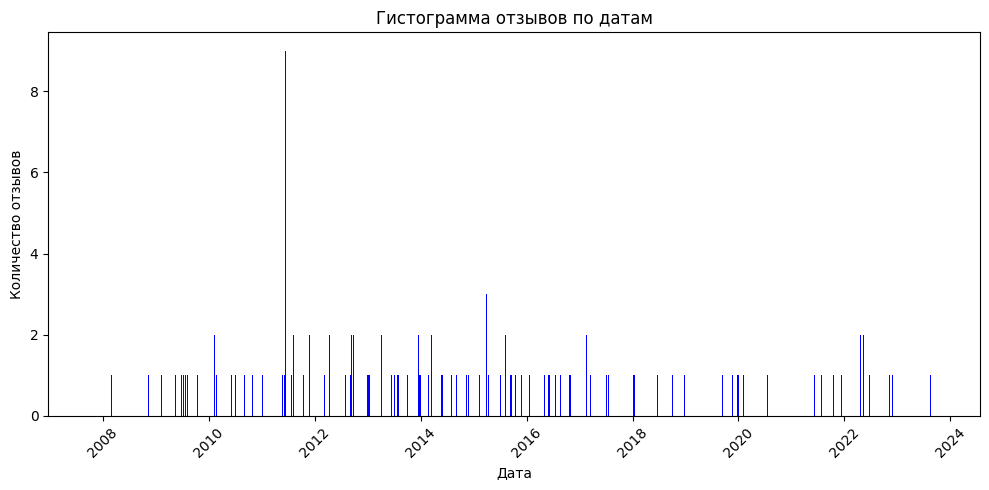

In [19]:
combined_df['dates'] = pd.to_datetime(combined_df['dates'])
review_counts = combined_df.groupby('dates')['reviews'].count().reset_index(name='review_count')

plt.figure(figsize=(10, 5))
plt.bar(review_counts['dates'], review_counts['review_count'], color='blue')

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество отзывов')
plt.title('Гистограмма отзывов по датам')

plt.tight_layout()
plt.show()

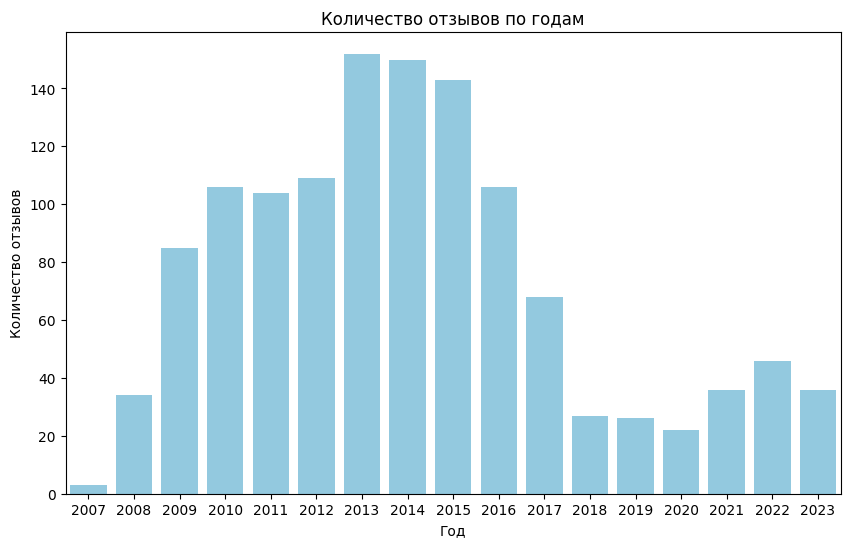

In [20]:
combined_df['year'] = combined_df['dates'].dt.year
reviews_per_year = combined_df.groupby('year').size().reset_index(name='review_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='review_count', data=reviews_per_year, color='skyblue')

plt.xlabel('Год')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов по годам')
plt.show()

combined_df = combined_df.drop('year', axis=1)

In [21]:
# name column

In [22]:
combined_df['name'].value_counts()

Vitamin_D           302
Biotin              191
Krill_oil           162
Colloidal_silver    161
Melatonin           153
Berberine           115
Folic_acid           96
Ginkgo               73
Name: name, dtype: Int64

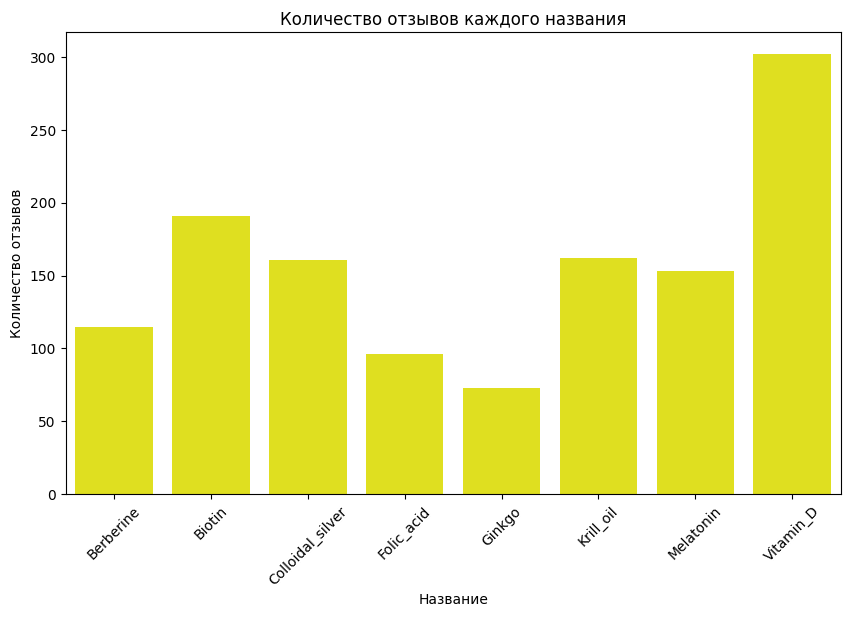

In [23]:
review_counts = combined_df.groupby('name')['reviews'].count().reset_index(name='review_count')
review_name = combined_df.groupby('name').size().reset_index(name='review_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='review_count', data=review_name, color='yellow')

plt.xticks(rotation=45)

plt.xlabel('Название')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов каждого названия')

plt.show()

In [24]:
# age column
combined_df['age'].describe()

count      1112
unique        9
top       55-64
freq        306
Name: age, dtype: object

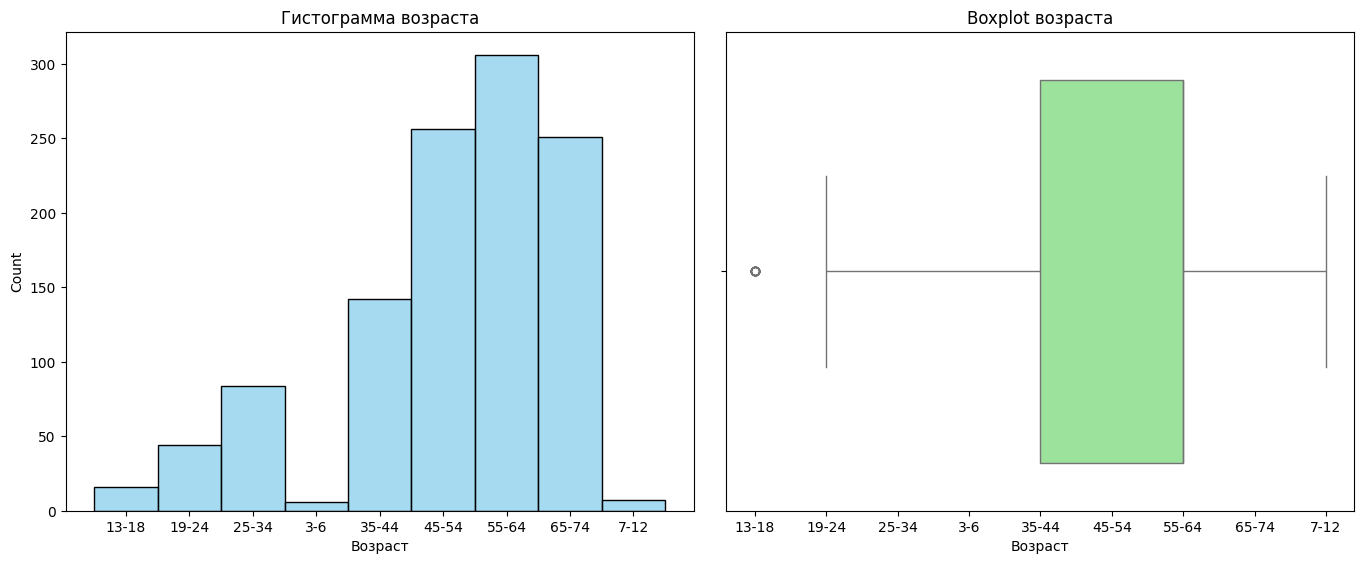

In [25]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['age'], kde=False, color='skyblue')
plt.title('Гистограмма возраста')
plt.xlabel('Возраст')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['age'], color='lightgreen')
plt.title('Boxplot возраста')
plt.xlabel('Возраст')

plt.tight_layout(pad=2)
plt.show()

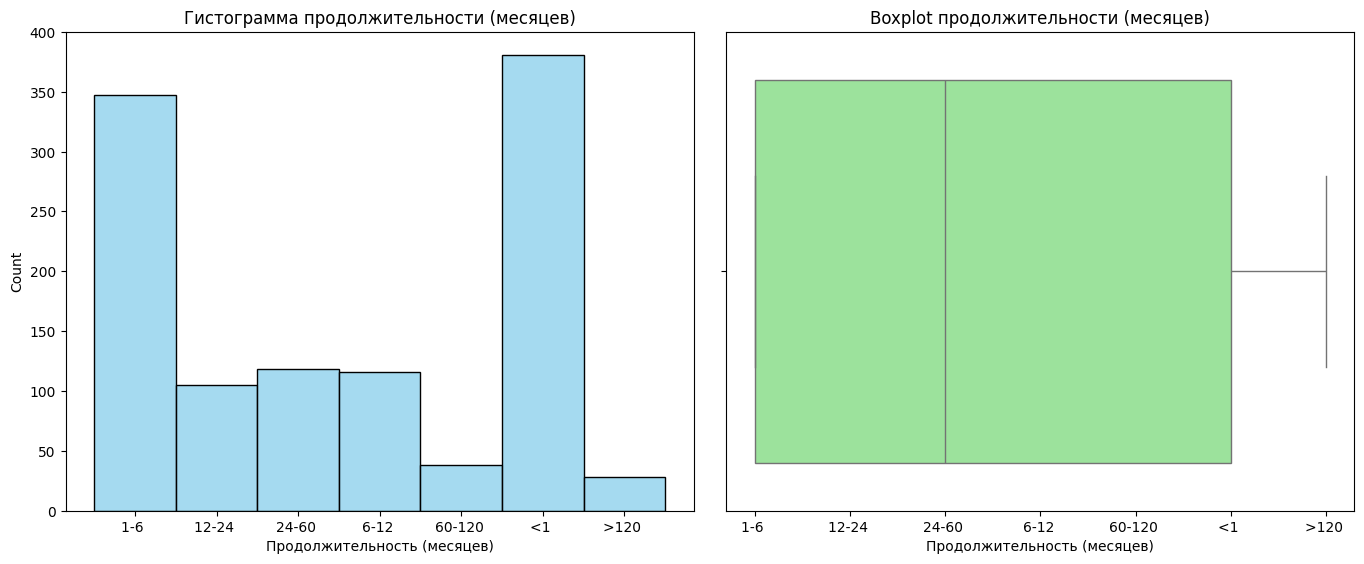

In [26]:
# duration, months column
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['duration, months'], kde=False, color='skyblue')
plt.title('Гистограмма продолжительности (месяцев)')
plt.xlabel('Продолжительность (месяцев)')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['duration, months'], color='lightgreen')
plt.title('Boxplot продолжительности (месяцев)')
plt.xlabel('Продолжительность (месяцев)')

plt.tight_layout(pad=2)
plt.show()

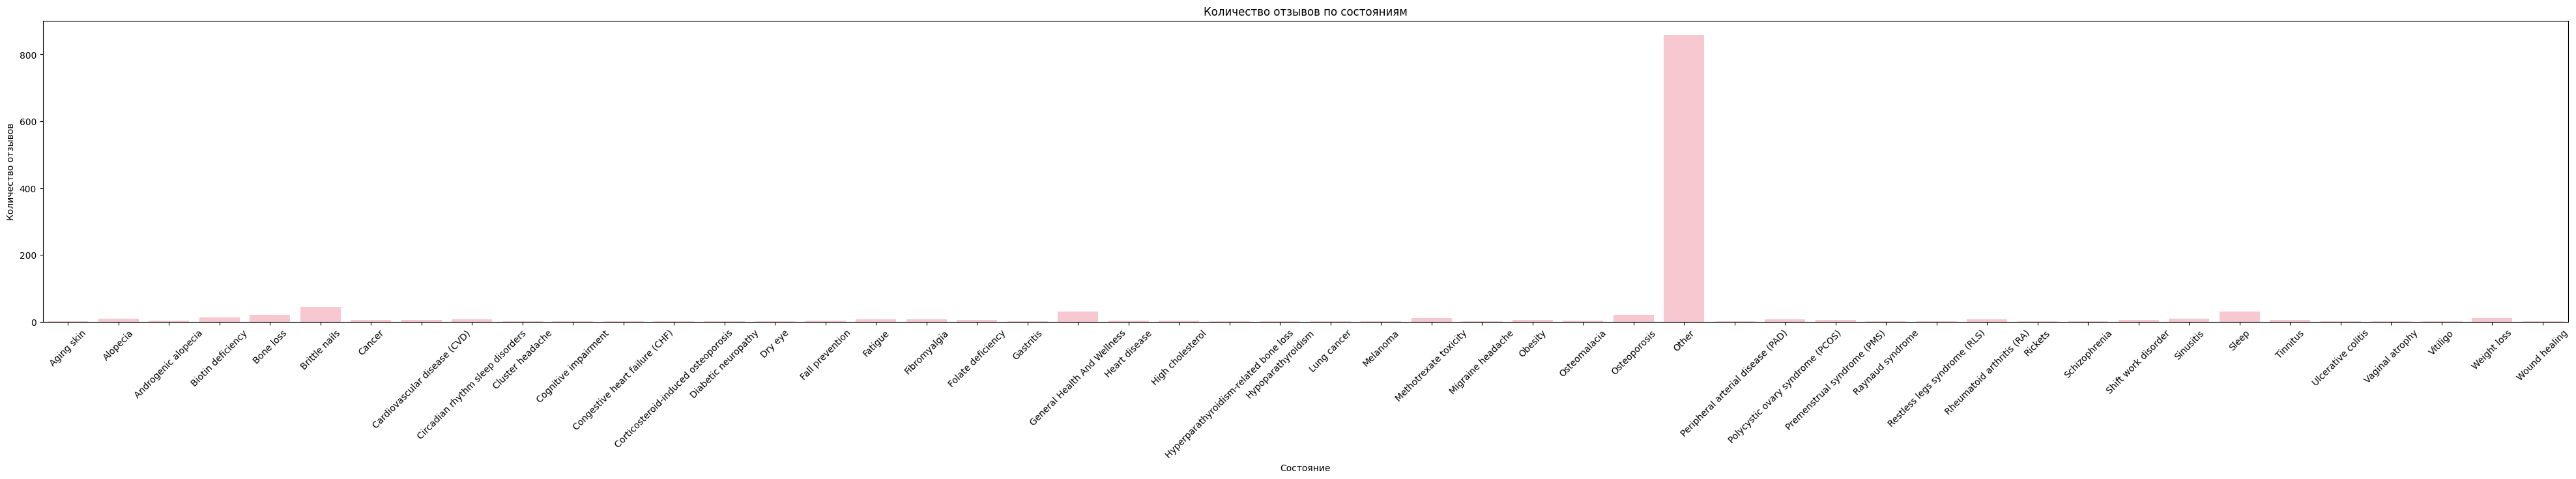

In [27]:
# сondition column
review_counts = combined_df.groupby('сondition')['reviews'].count().reset_index(name='review_count')
review_cond = combined_df.groupby('сondition').size().reset_index(name='review_count')

plt.figure(figsize=(50, 6))
sns.barplot(x='сondition', y='review_count', data=review_cond, color='pink')

plt.xticks(rotation=45)

plt.xlabel('Состояние')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов по состояниям')

plt.show()

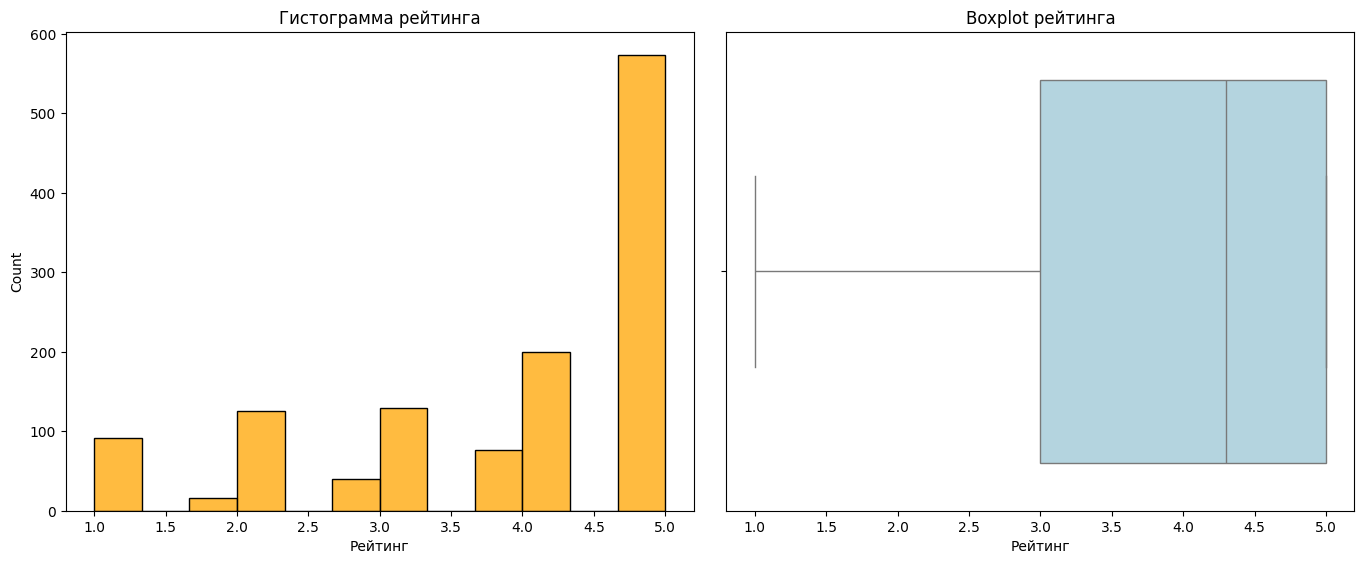

In [28]:
# overall rating column
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['overall rating'], kde=False, color='orange')
plt.title('Гистограмма рейтинга')
plt.xlabel('Рейтинг')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['overall rating'], color='lightblue')
plt.title('Boxplot рейтинга')
plt.xlabel('Рейтинг')

plt.tight_layout(pad=2)
plt.show()

In [29]:
combined_df['overall rating'].value_counts()

5.0    501
4.3    100
4.0    100
1.0     83
2.3     83
3.7     76
3.0     74
4.7     73
3.3     55
2.0     43
2.7     40
1.7     16
1.3      9
Name: overall rating, dtype: int64

In [30]:
combined_df['overall rating'].describe()

count    1253.000000
mean        3.886353
std         1.268347
min         1.000000
25%         3.000000
50%         4.300000
75%         5.000000
max         5.000000
Name: overall rating, dtype: float64

In [31]:
# review column
import nltk
import seaborn as sns
import sklearn
import gensim
#import pyLDAvis
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
#import textstat

Text(0.5, 1.0, 'Length of Reviews Distribution')

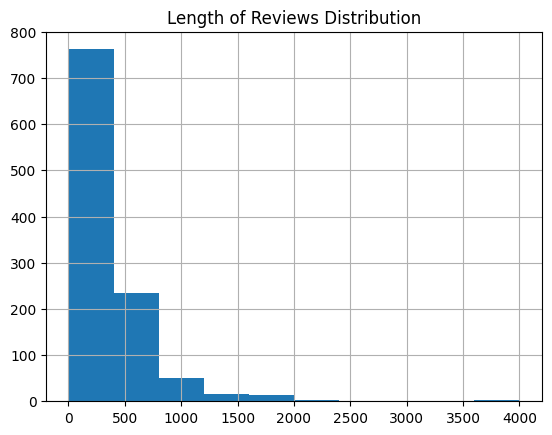

In [32]:
combined_df['reviews'].str.len().hist()
plt.title('Length of Reviews Distribution')

Text(0.5, 1.0, 'the number of words')

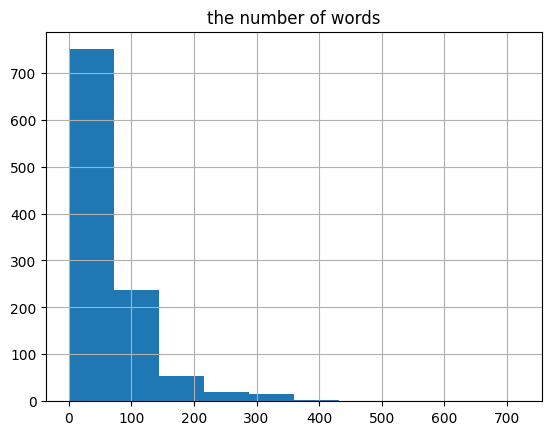

In [33]:
df1 = combined_df.dropna(subset=['reviews'])
df1['reviews'].str.split().apply(lambda x: len(x)).hist()
plt.title('the number of words')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'average word length')

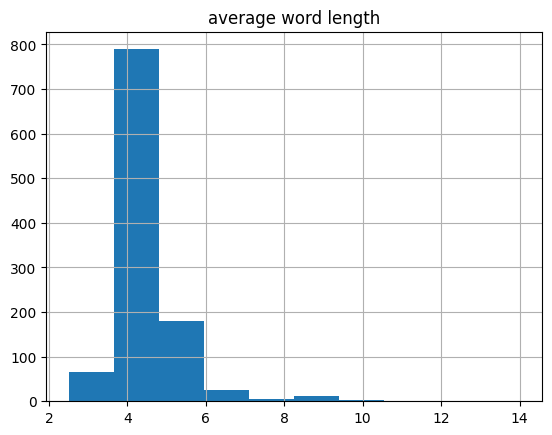

In [34]:
df1['reviews'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('average word length')

In [35]:
# data cleaning

In [36]:
df = combined_df.dropna(subset=['reviews'])
df = df.drop_duplicates()

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
corpus=[]

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= df['reviews'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

Text(0.5, 1.0, 'stopwords')

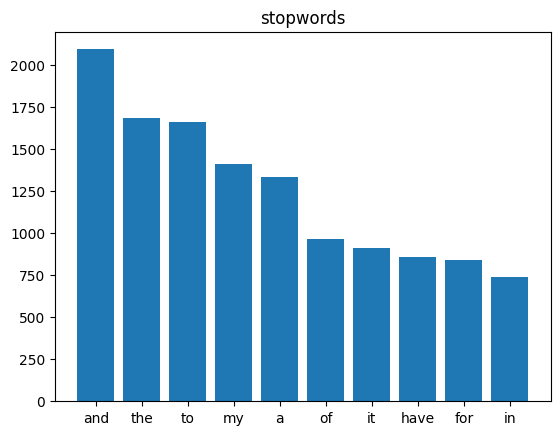

In [39]:
plot_top_stopwords_barchart(df['reviews'])
plt.title('stopwords')

In [40]:
from collections import  Counter
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= df['reviews'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'non stopwords')

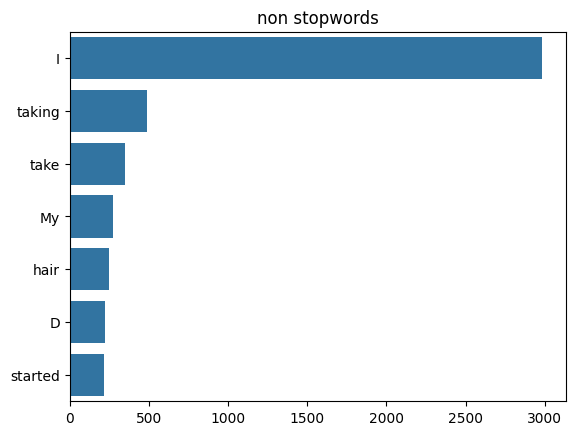

In [41]:
plot_top_non_stopwords_barchart(df['reviews'])
plt.title('non stopwords')

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new = df['reviews'].str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'top bigrams')

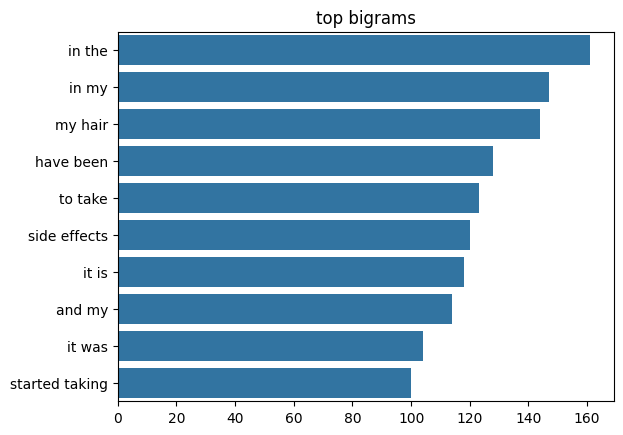

In [43]:
plot_top_ngrams_barchart(df['reviews'],2)
plt.title('top bigrams')

Text(0.5, 1.0, 'top trigrams')

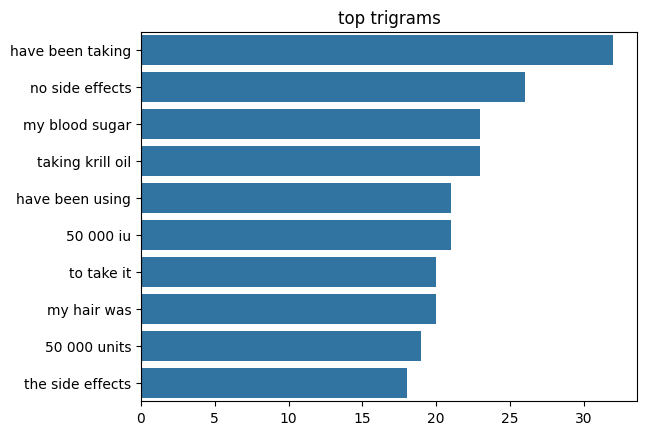

In [44]:
plot_top_ngrams_barchart(df['reviews'],3)
plt.title('top trigrams')

In [57]:
# replacing the age and duration range with a larger range number
def extract_replace_range(range_str):
    if '-' in range_str:
        return range_str.split('-')[1]
    elif '<' in range_str:
        return '1'
    elif '>' in range_str:
        return '130'
    else:
        return range_str

df['age'] = df['age'].apply(extract_replace_range)
df['duration, months'] = df['duration, months'].apply(extract_replace_range)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# handling missing values
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].median()).astype('int64')

df['duration, months'] = pd.to_numeric(df['duration, months'], errors='coerce')
df['duration, months'] = df['duration, months'].fillna(df['duration, months'].median()).astype('int64')

df['сondition'] = df['сondition'].cat.add_categories('other')
df['сondition'].fillna('Other', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 3 to 1252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1080 non-null   int64         
 1   dates             1080 non-null   datetime64[ns]
 2   name              1080 non-null   string        
 3   age               1080 non-null   int64         
 4   duration, months  1080 non-null   int64         
 5   сondition         1080 non-null   category      
 6   overall rating    1080 non-null   float64       
 7   reviews           1080 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1), string(1)
memory usage: 71.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
df.head(80)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,dates,name,age,"duration, months",сondition,overall rating,reviews
3,4,2023-01-31,Ginkgo,74,1,Tinnitus,2.7,No effect on tinnitus
4,5,2022-03-11,Ginkgo,64,6,Peripheral arterial disease (PAD),4.3,"Take gingo for the pain in my legs, it works. ..."
5,6,2021-10-07,Ginkgo,54,6,Other,3.0,Besides the fact that individual effects invar...
6,7,2021-09-01,Ginkgo,64,6,Other,2.0,About a week after I started using ginkgo bilo...
7,8,2021-07-28,Ginkgo,54,6,Other,4.0,Goes to show you how unreliable WebMD is. This...
...,...,...,...,...,...,...,...,...
96,97,2014-08-05,Folic_acid,44,6,Other,3.0,one ear still block
97,98,2014-07-29,Folic_acid,64,6,Other,3.7,My doctor added this supplement to my antidepr...
98,99,2014-06-24,Folic_acid,64,6,Cancer,4.0,just want to know the benefits
99,100,2014-05-27,Folic_acid,54,24,Folate deficiency,2.0,I think to call folic acid 'folate' as if they...


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 3 to 1252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1080 non-null   int64         
 1   dates             1080 non-null   datetime64[ns]
 2   name              1080 non-null   string        
 3   age               1080 non-null   int64         
 4   duration, months  1080 non-null   int64         
 5   сondition         1080 non-null   category      
 6   overall rating    1080 non-null   float64       
 7   reviews           1080 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1), string(1)
memory usage: 71.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
#missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                  0
dates               0
name                0
age                 0
duration, months    0
сondition           0
overall rating      0
reviews             0
dtype: int64

In [62]:
df.to_csv("cleaned_data.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
